In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
from scipy.signal import lfilter,butter,filtfilt
import itertools
from scipy.stats import pearsonr
from scipy.signal import welch
#import seaborn as sns

In [6]:
nic=scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_10_FP_mean_denoisedTS.mat')
data = nic['mts'].T
print(data.shape)

(29, 3890)


In [7]:
roinames = nic["roi_names"].flatten()
for name in roinames:
    print(name[0])

ACC
L_Acb
L_Amygdala
L_Amygdala_CM_Juelich50
L_Amygdala_LB_Juelich50_minus_intersect
L_Amygdala_SF_Juelich50
L_Caudate
L_FOrb
L_Hipp
L_Insula
L_MidFG
L_Pallidum
L_Putamen
L_SN_Hammersn30r83_74
L_Thalamus
R_Acb
R_Amygdala
R_Amygdala_CM_Juelich50
R_Amygdala_LB_Juelich50_minus_intersect
R_Amygdala_SF_Juelich50
R_Caudate
R_FOrb
R_Hipp
R_Insula
R_MidFG
R_Pallidum
R_Putamen
R_SN_Hammersn30r83_75
R_Thalamus


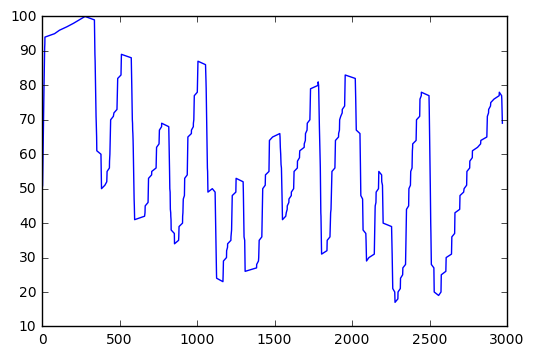

In [8]:
nict = scipy.io.loadmat('CircuitROIsMTS/LMP_NIC_10-FP/09-Mar-2017_12-47_LMP_NIC_10_FP.mat')
craving = nict['craveUpdate']
crav_t=(craving[0][0][0].T).flatten()
crav_v=(craving[0][0][1].T).flatten()
plt.plot(crav_t,crav_v)

In [9]:
# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_bandpass(lowcut,highcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    b,a = butter(order, [low, high], btype='band')
    return b,a

def butter_bandpass_filter(data,lowcut,highcut,fs,order=5):
    b,a = butter_bandpass(lowcut,highcut,fs,order=order)
    return filtfilt(b,a,data)

# create a 10th order Butterworth filter from 0.01 to 0.1 Hz
def butter_lowpass(lowcut,fs,order=8):
    nyq = 0.5*fs
    low = lowcut/nyq

    b,a = butter(order, low, btype='low')
    return b,a

def butter_lowpass_filter(data,lowcut,fs,order=5):
    b,a = butter_lowpass(lowcut,fs,order=order)
    return filtfilt(b,a,data)

sampling_freq = 1/0.802
print(sampling_freq)

1.2468827930174562


[ 316  556  796 1036 1276 1516 1756 1996 2236 2476]


/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


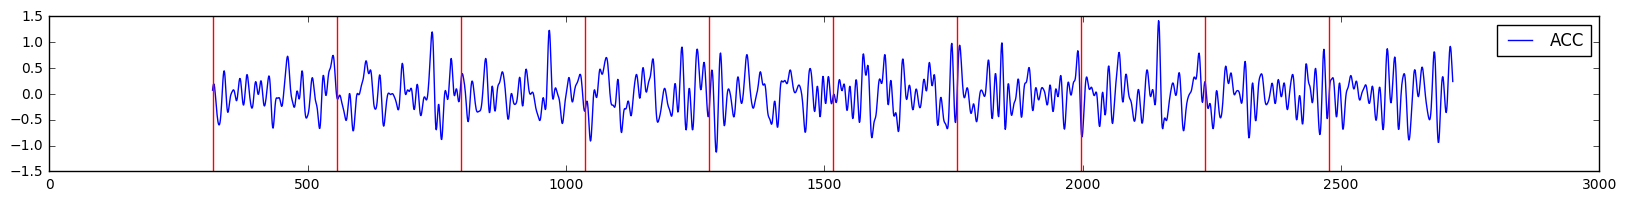

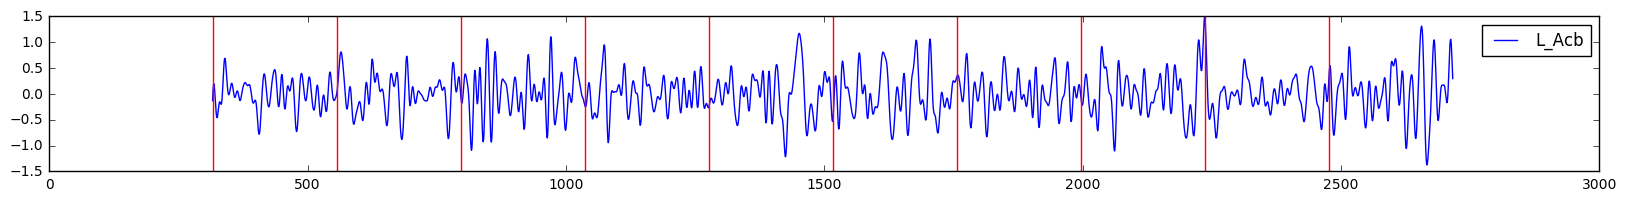

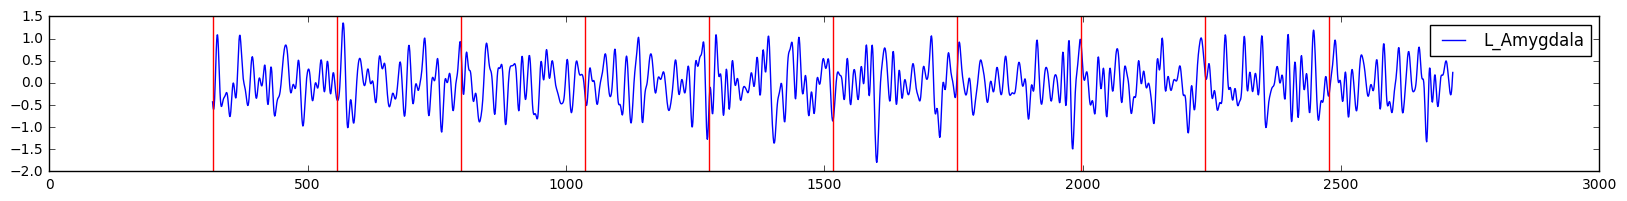

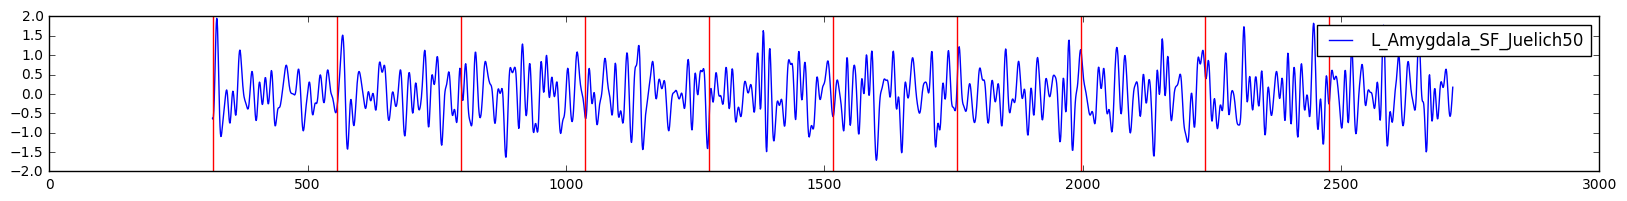

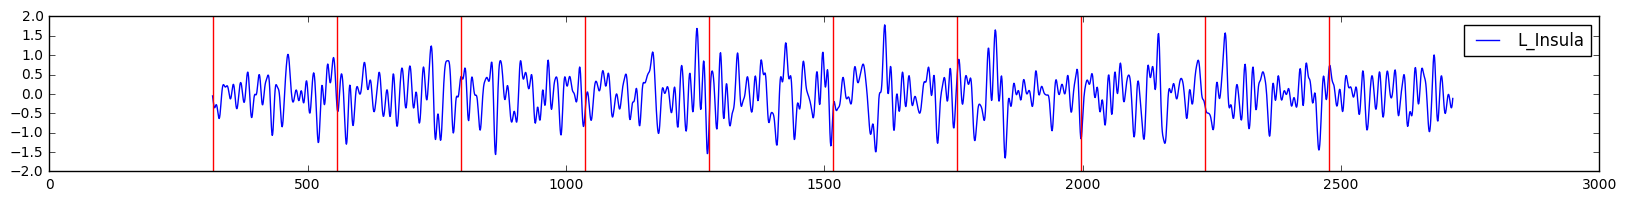

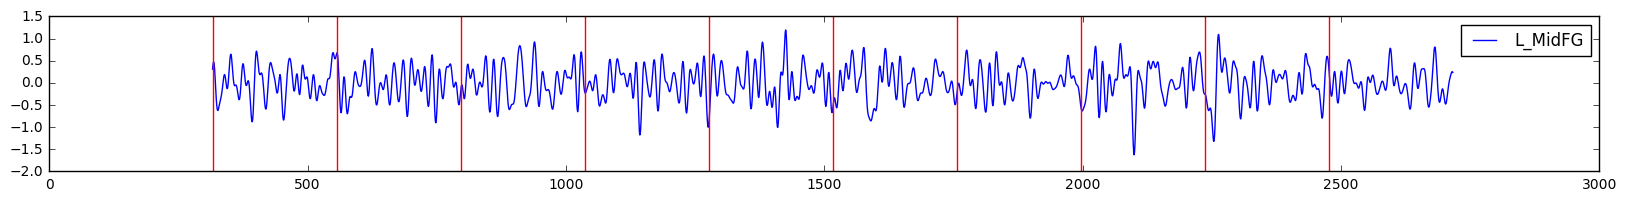

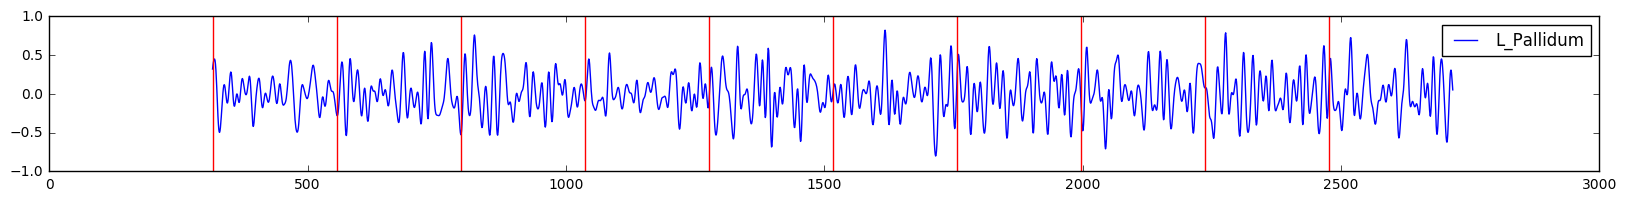

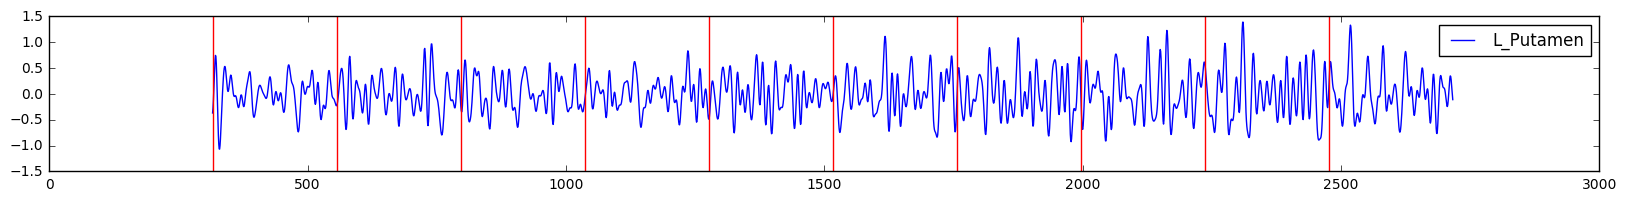

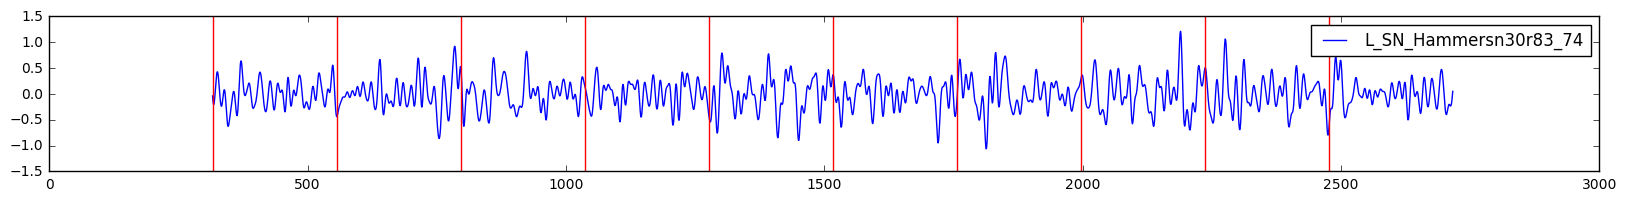

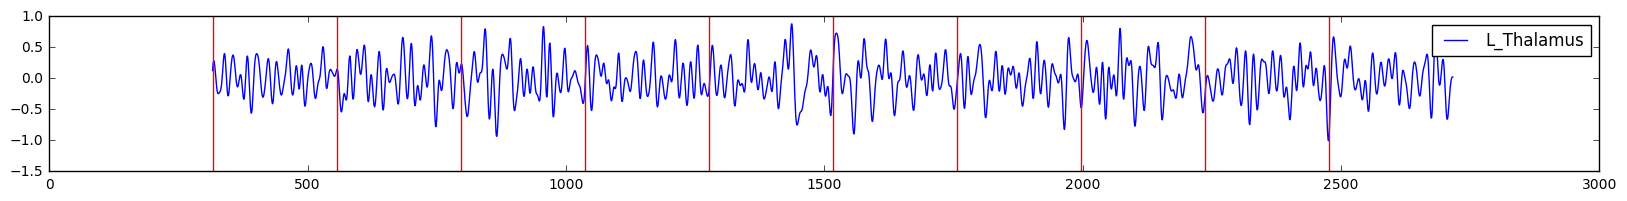

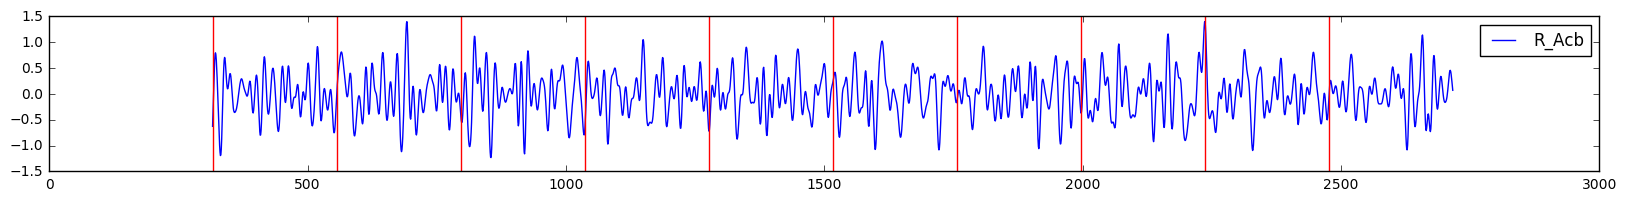

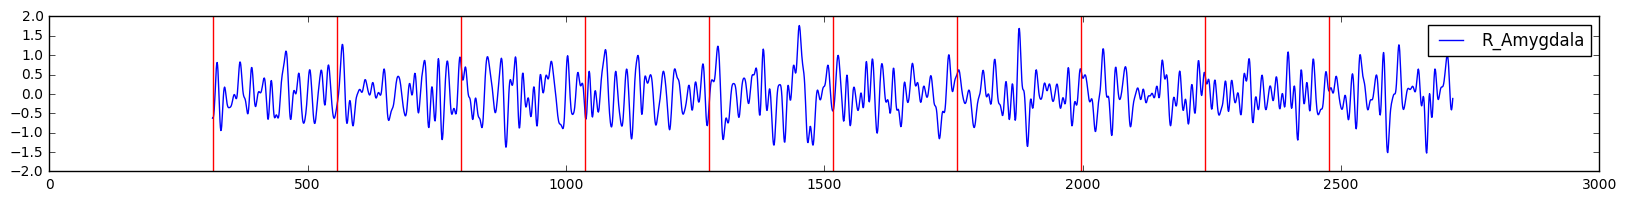

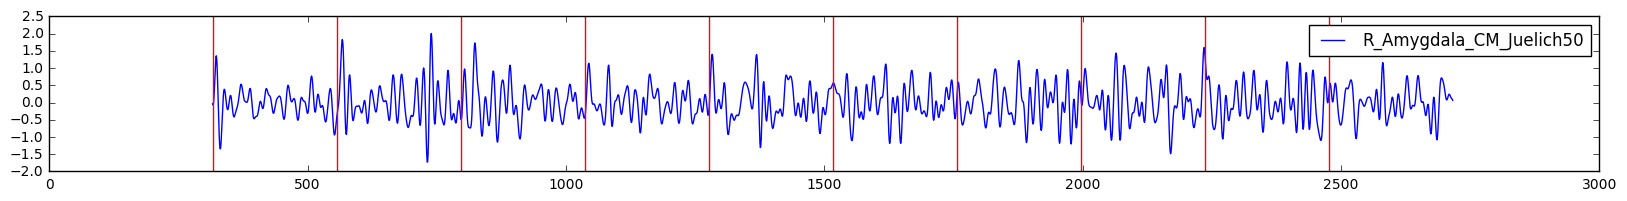

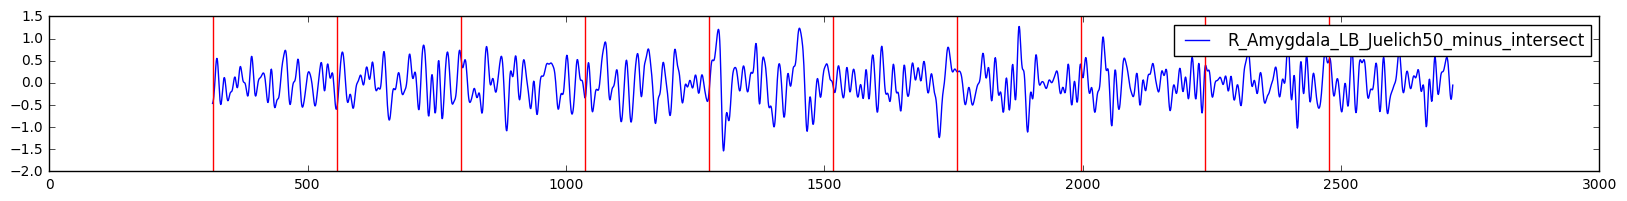

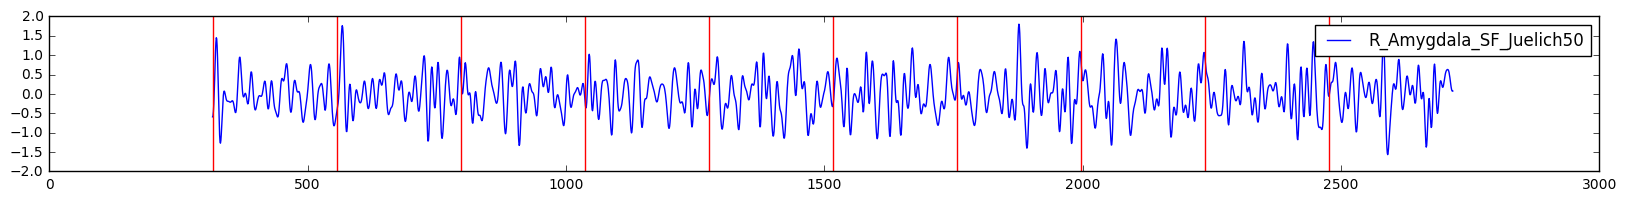

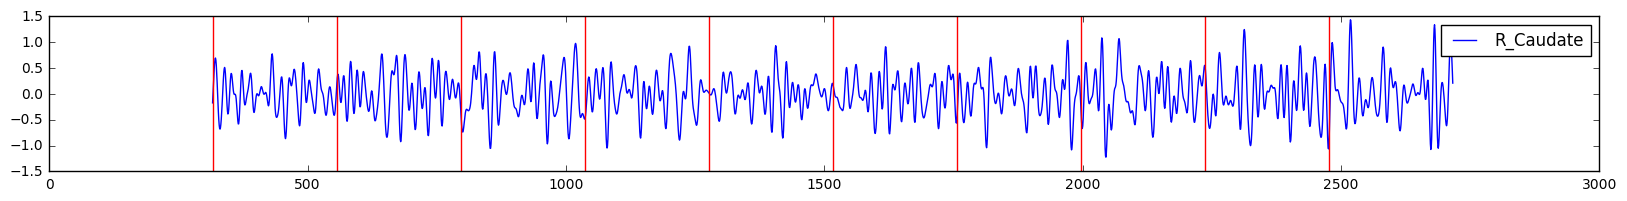

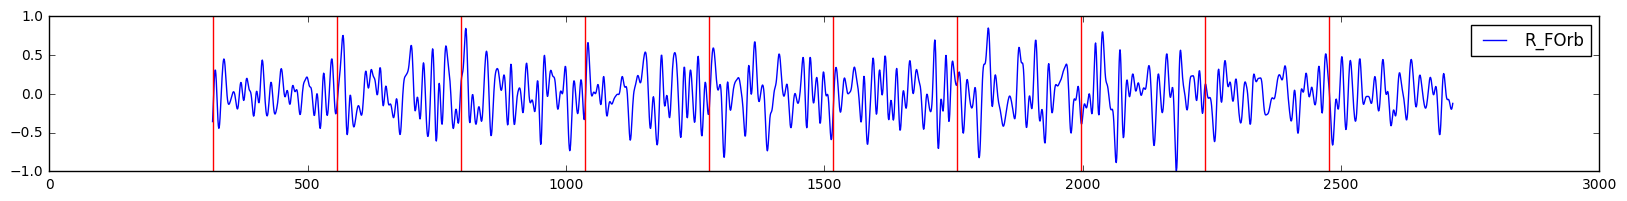

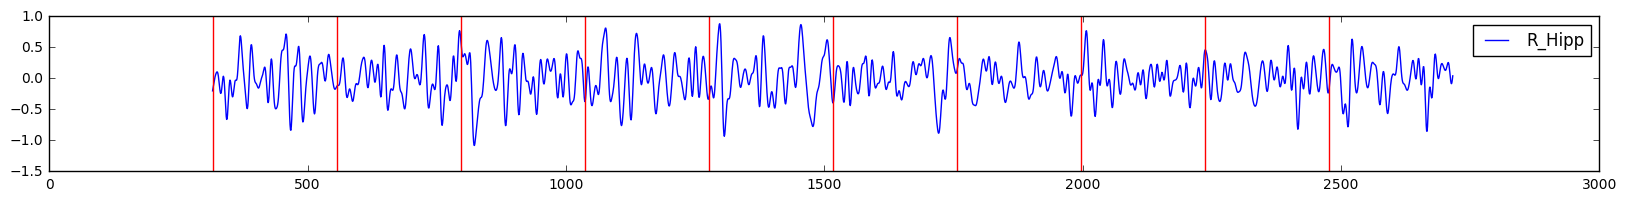

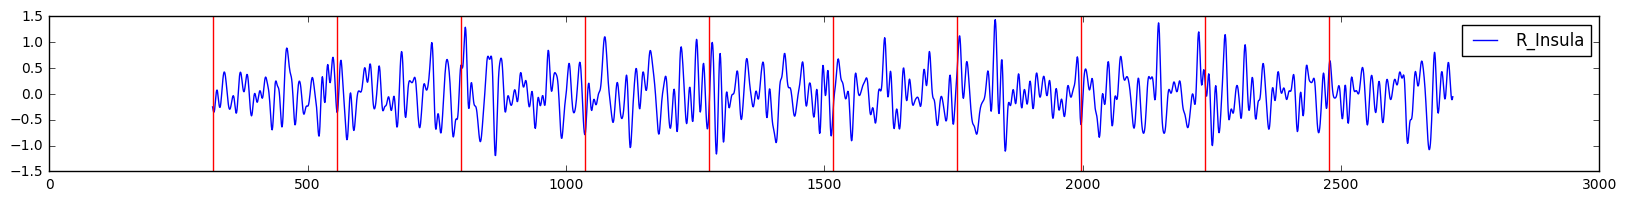

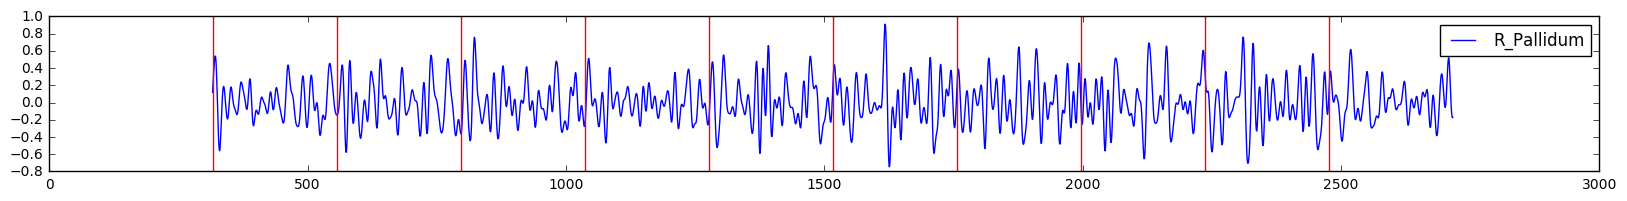

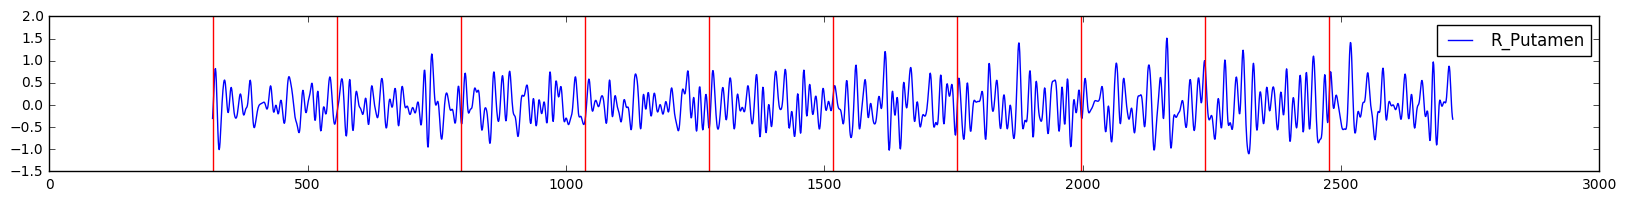

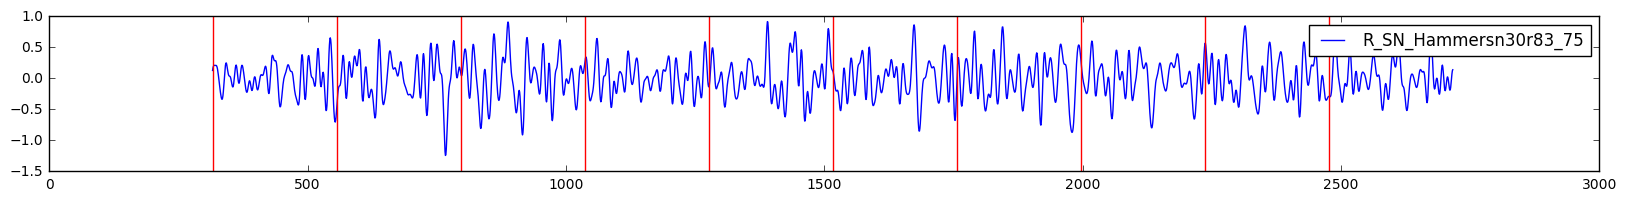

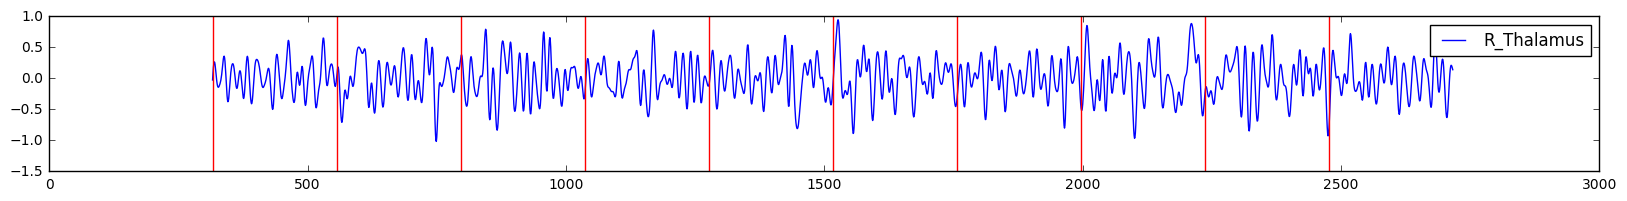

In [10]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
t = np.linspace(0,3889*.802,3890)
data_filtered = None
puffs=np.arange(316,2500,240)
print(puffs)
for trace,name in zip(data,roinames):
    trace_filtered = butter_bandpass_filter(trace,0.01,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered is None:
        data_filtered = trace_filtered
    else:
        data_filtered = np.vstack((data_filtered,trace_filtered))

In [11]:
data_filtered.shape

(29, 3890)

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


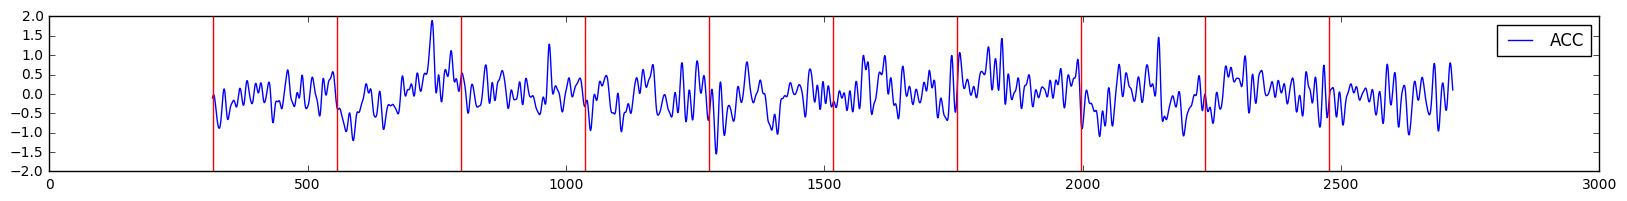

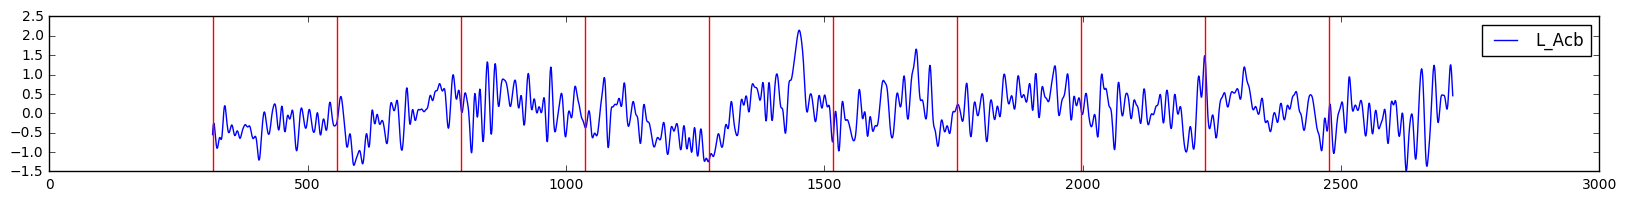

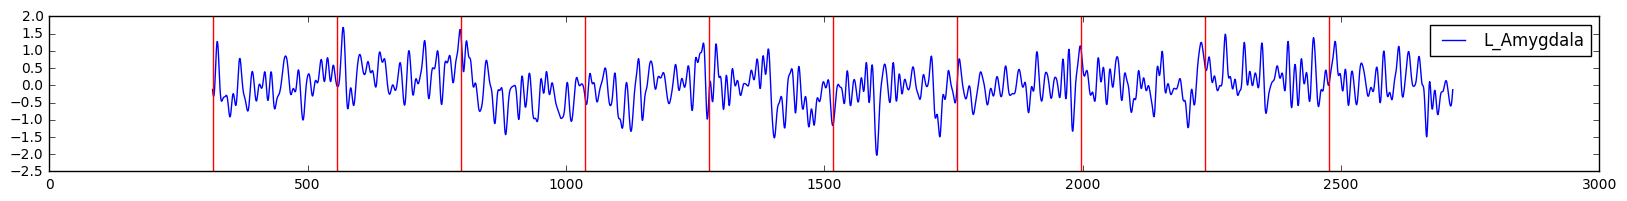

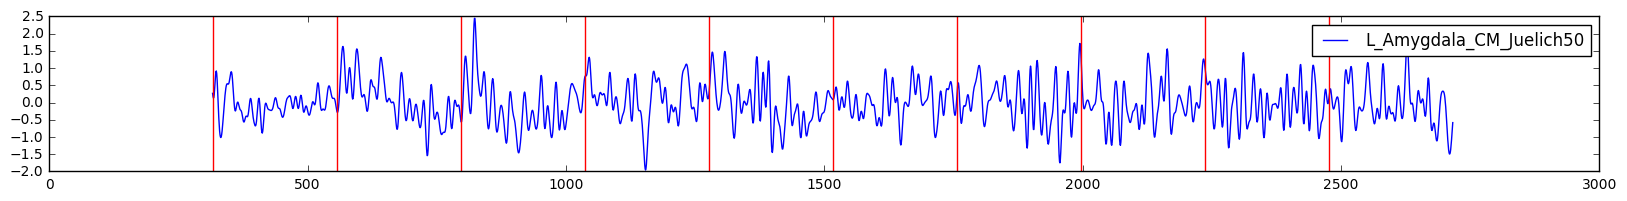

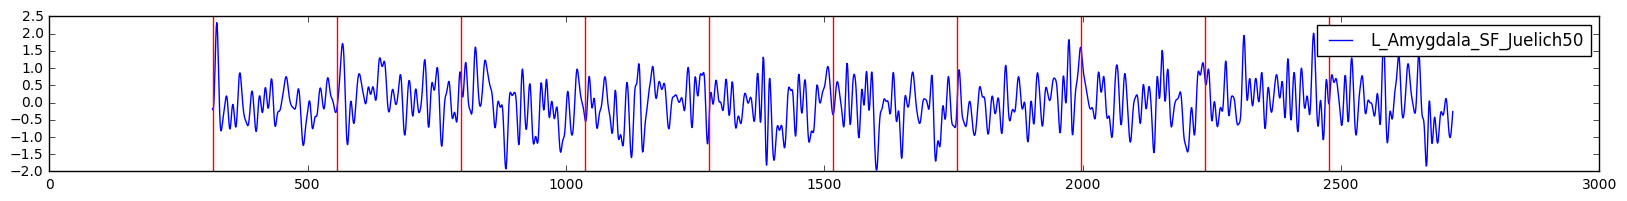

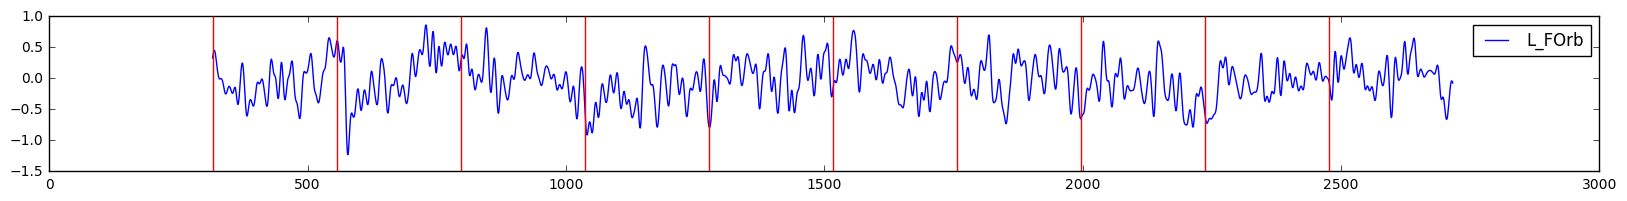

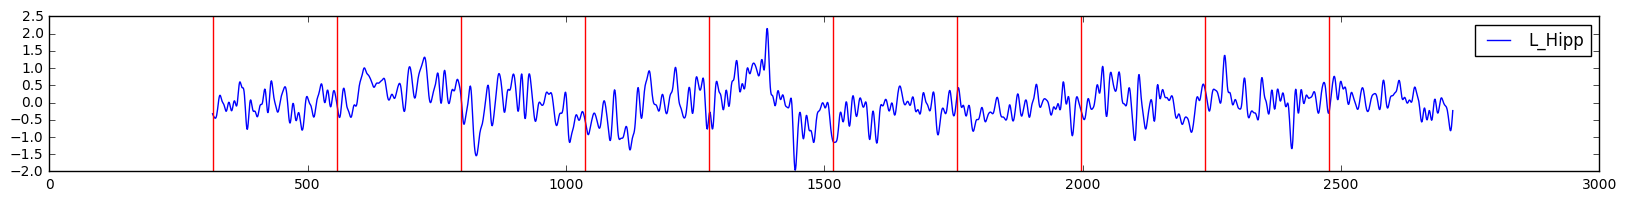

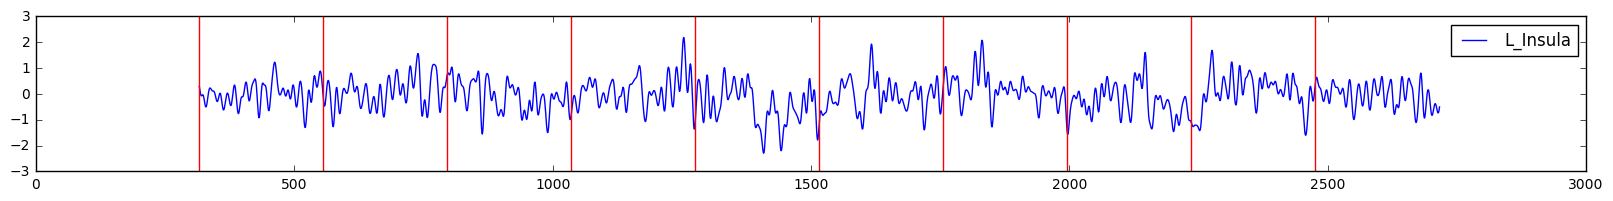

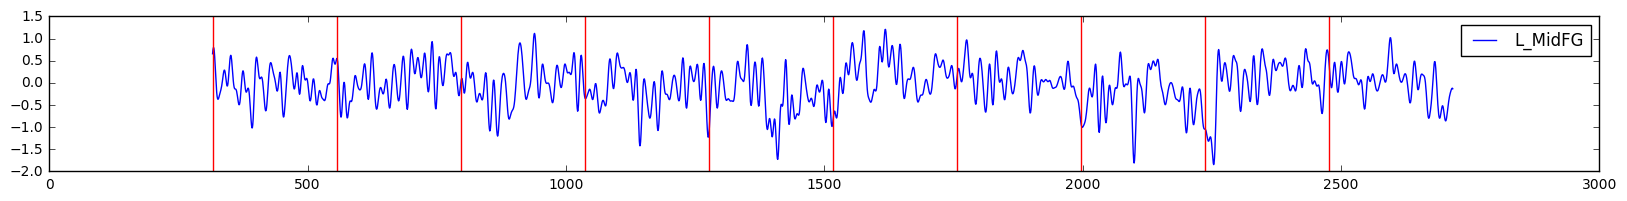

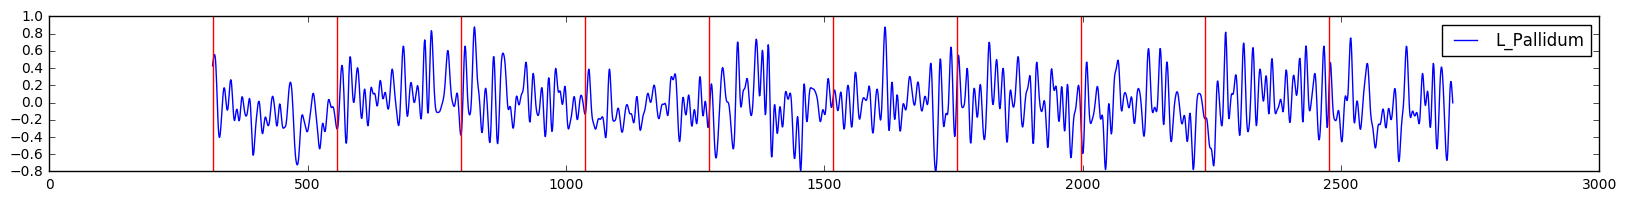

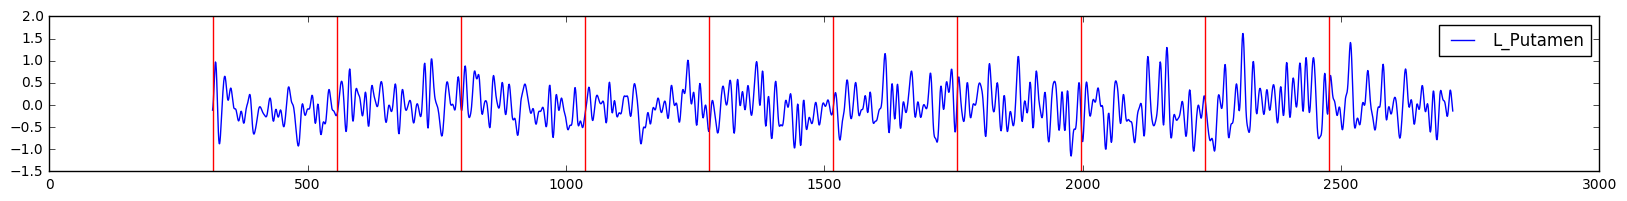

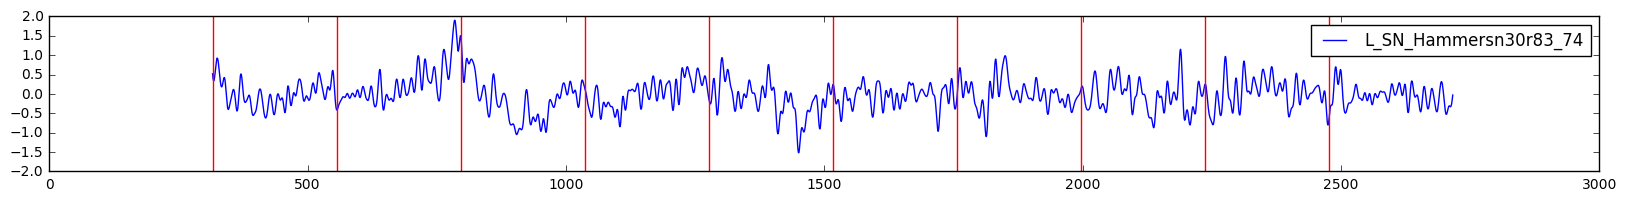

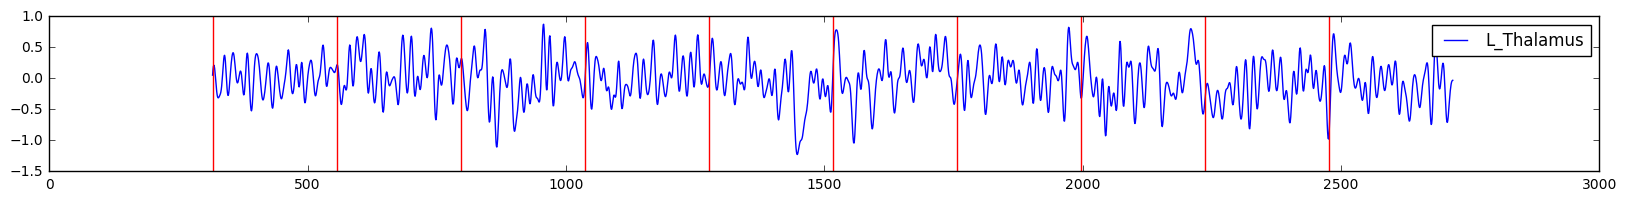

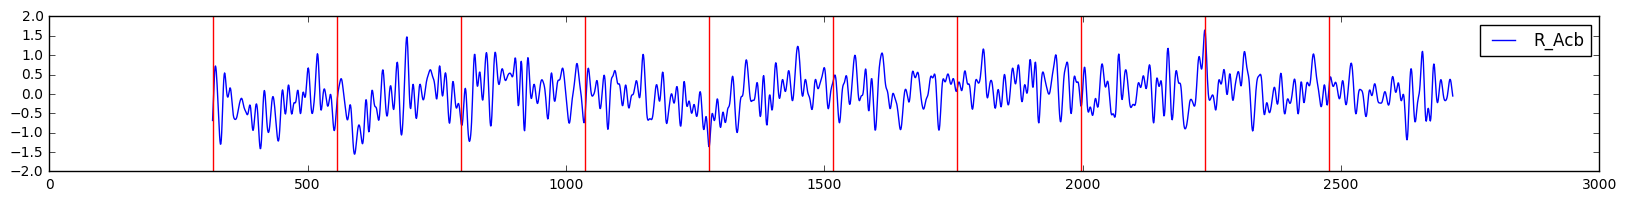

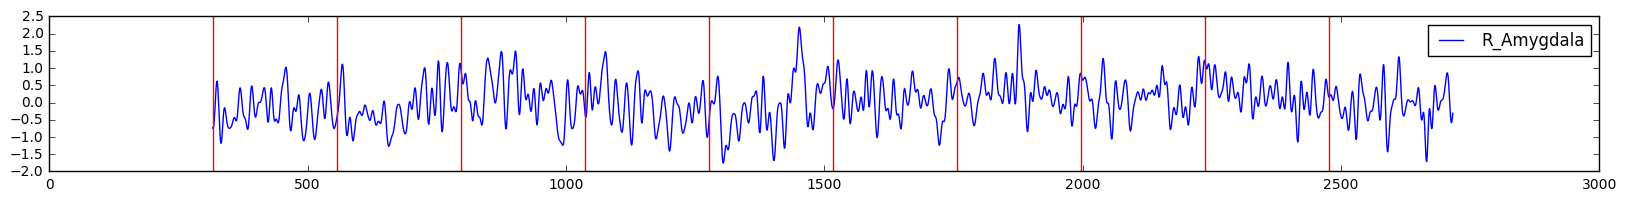

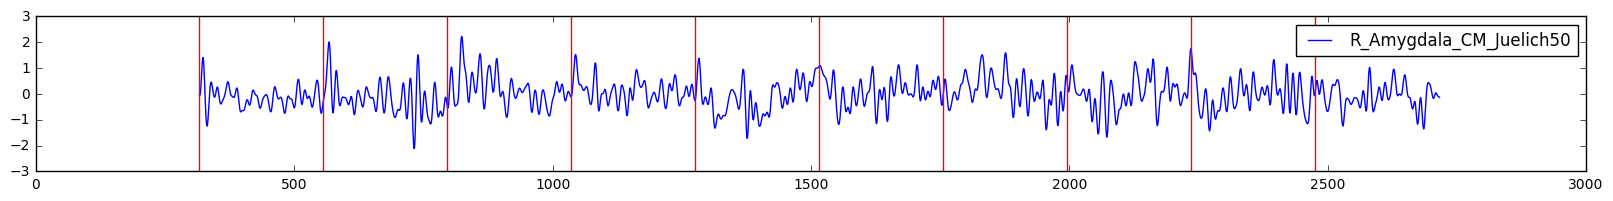

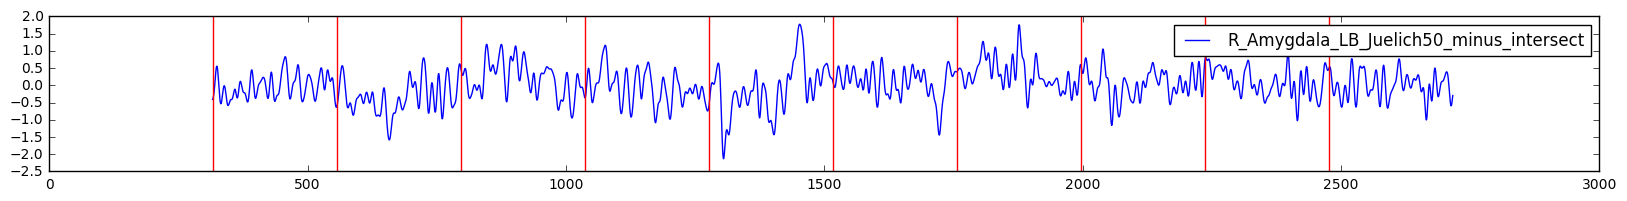

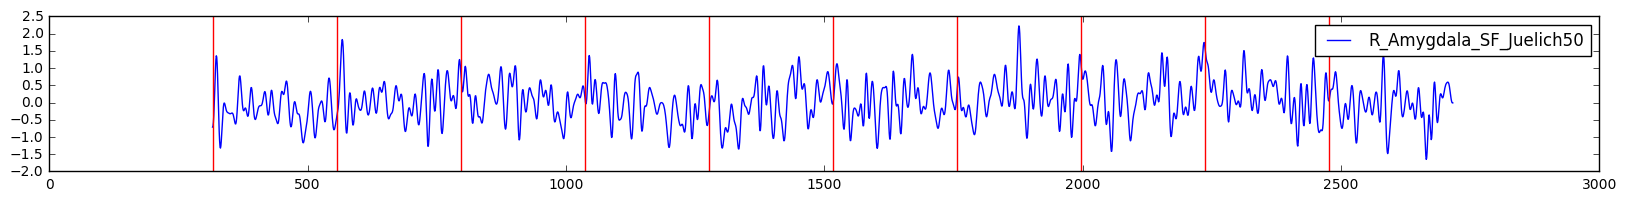

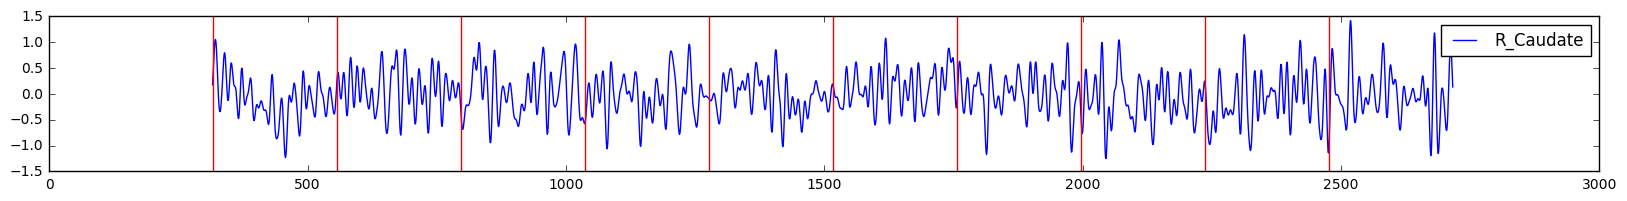

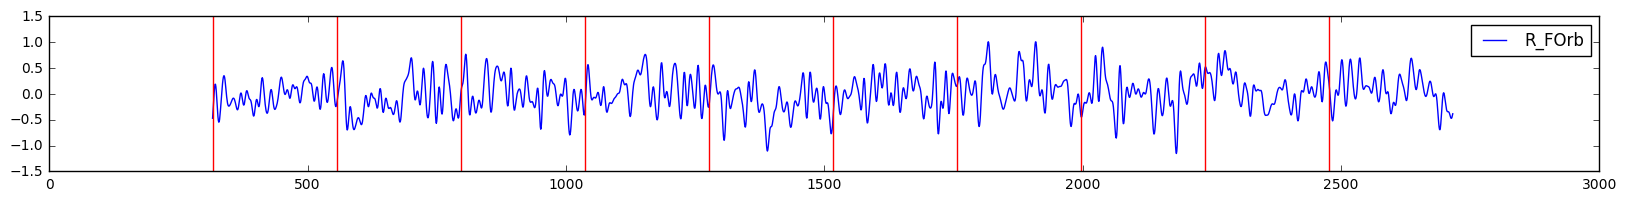

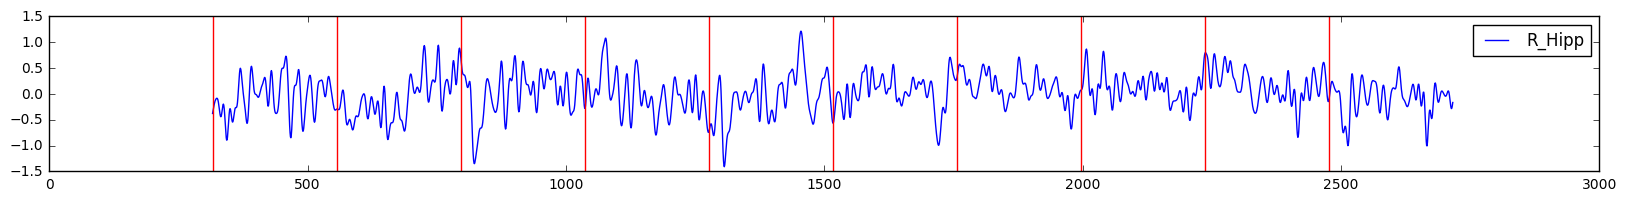

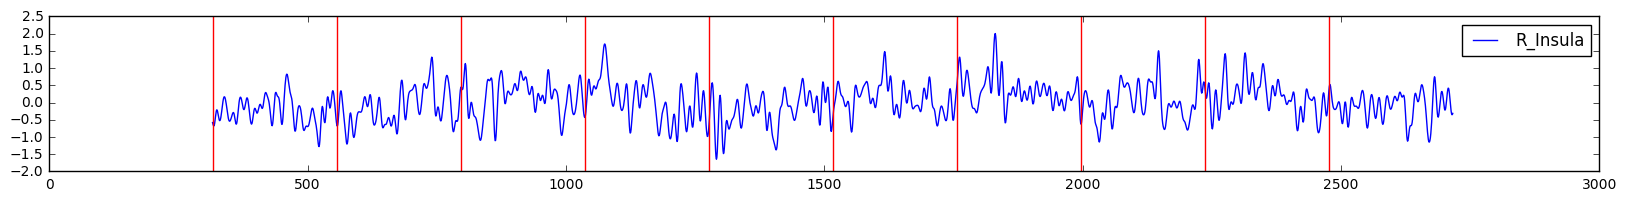

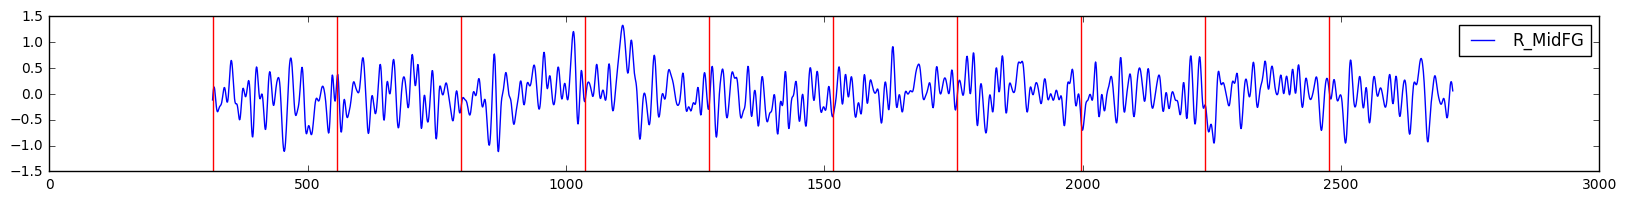

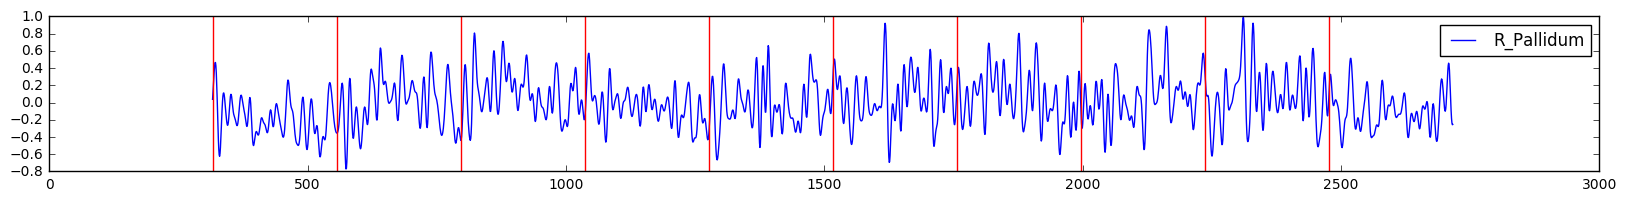

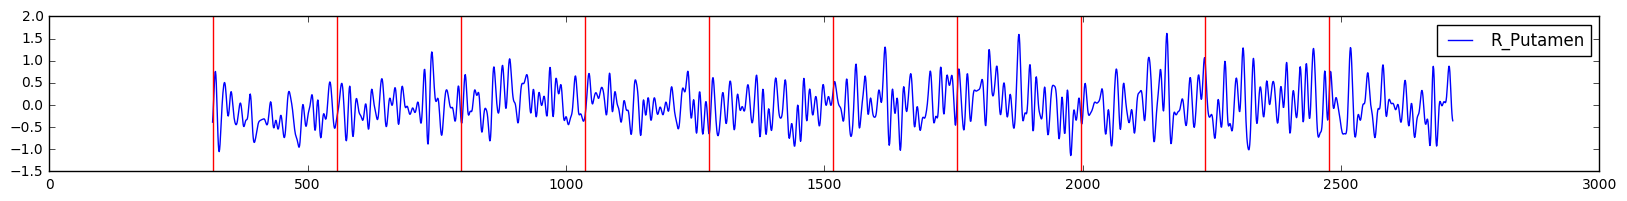

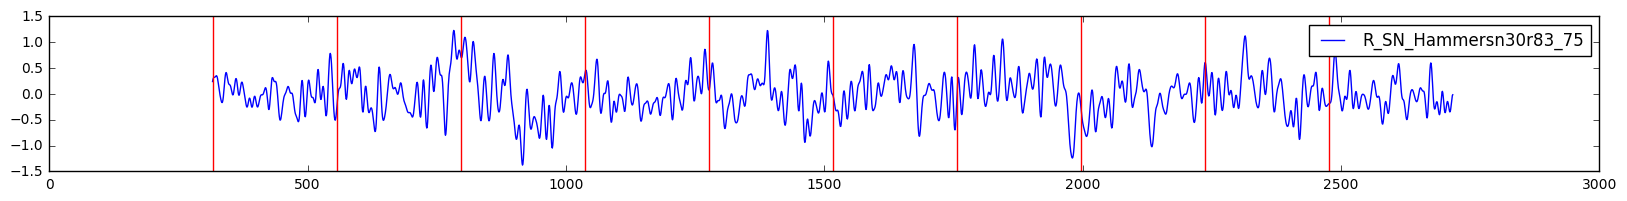

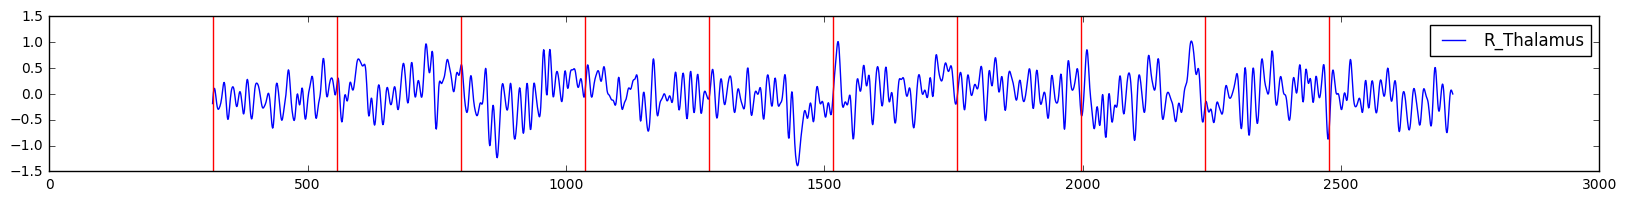

In [12]:
# comment about the indexing:
# the puffs start at second 316 and then happen every 4min = 240sec
# 316/0.802 = 394
# 2400/0.802 = 2992.52
data_filtered_low = None
for trace,name in zip(data,roinames):
    trace_filtered_low = butter_lowpass_filter(trace,0.1,sampling_freq,order=5)
    plt.figure(figsize=(20,2))
    plt.plot(t[394:394+2994],trace_filtered_low[394:394+2994],label=name[0])
#    plt.xlim((0,1000))
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()
    if data_filtered_low is None:
        data_filtered_low = trace_filtered_low
    else:
        data_filtered_low = np.vstack((data_filtered_low,trace_filtered_low))

In [13]:
def pearson_combined(data):
    results = None
    for perm in itertools.combinations(range(data.shape[0]),2):
        pc=pearsonr(data[perm[0]],data[perm[1]])
        result=np.array([perm[0],perm[1],pc[0],pc[1]])
        if results is None:
            results = result
        else:
            results = np.vstack((results,result))
    return results
results_array = pearson_combined(data_filtered)

In [14]:
sorted_results=results_array[results_array[:,2].argsort()[::-1]]

In [15]:
for i,j,pr,pp in sorted_results:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.879051806205 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.869525084148 0.0
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.86841425448 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.847700404708 0.0
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.836931538958 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.820378481583 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.807991168394 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.802114444899 0.0
4.0 8.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Hipp'] 0.790342579341 0.0
25.0 26.0 ['R_Pallidum'] ['R_Putamen'] 0.77530431512 0.0
5.0 19.0 ['L_Amygdala_SF_Juelich50'] ['R_Amygdala_SF_Juelich50'] 0.759038668108 0.0
11.0 12.0 ['L_Pallidum'] ['L_Putamen'] 0.756353900223 0.0
16.0 22.0 ['R_Amygdala'] ['R_Hipp'] 0.756145390806 0.0
18.0 22.0 ['R_Amygdala_LB_Juelich50_minus_intersect'] ['R_Hipp'] 0.721584519191 0.0
2.0 16.0 ['L_Amygdala'] ['R_Amygdala'] 

In [16]:
def sliding_window_pearson(data1,data2,window_size,step=1):
    pr = [pearsonr(data1[index:index+window_size],data2[index:index+window_size])[0]
          for index in range(0,min(data1.size,data2.size),step)]
    pr = np.array(pr)
    return pr

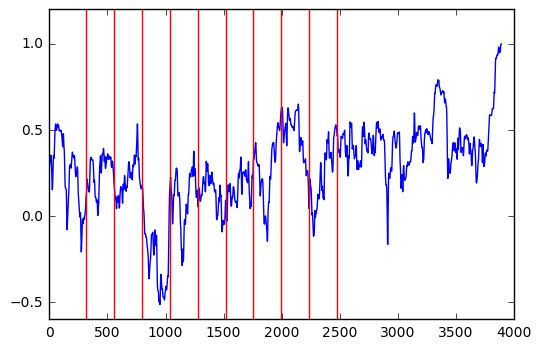

In [17]:
plt.plot(sliding_window_pearson(data_filtered[15],data_filtered[22],100))
for p in puffs:
    plt.axvline(x=p,color="r")


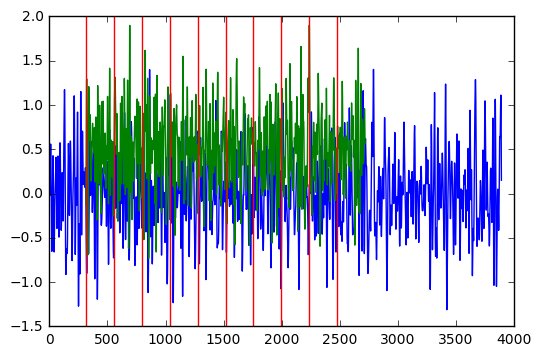

In [18]:
# new strategy:
# we compare pearson correlations of the puffs to r's from time where there is no delivery
# two time series: puffs from first puff to 2min after last puff
# nopuffs - the rest
plt.plot(range(data_filtered[15].size),data_filtered[15])
plt.plot(t[394:394+2994],data_filtered[15][394:394+2994]+0.5)
for p in puffs:
    plt.axvline(x=p,color="r")



In [19]:
data_puffs = data_filtered[:,394:394+2994]
data_nopuffs1=data_filtered[:,:394]
data_nopuffs2=data_filtered[:,394+2994:]
data_nopuffs=np.hstack((data_nopuffs1,data_nopuffs2))
print(data_puffs.shape, data_nopuffs.shape)
print(data_puffs.shape[1]+data_nopuffs.shape[1])

(29, 2994) (29, 896)
3890


In [20]:
results_puffs = pearson_combined(data_puffs)
sorted_results_puffs=results_puffs[results_puffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_puffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.874430378773 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.871787540134 0.0
14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.850661903767 0.0
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.847635955776 0.0
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.837823853169 0.0
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.819936172685 0.0
4.0 8.0 ['L_Amygdala_LB_Juelich50_minus_intersect'] ['L_Hipp'] 0.803101371133 0.0
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.802152229212 0.0
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.780147544603 0.0
16.0 22.0 ['R_Amygdala'] ['R_Hipp'] 0.777090534642 0.0
5.0 19.0 ['L_Amygdala_SF_Juelich50'] ['R_Amygdala_SF_Juelich50'] 0.763132753412 0.0
25.0 26.0 ['R_Pallidum'] ['R_Putamen'] 0.758802905623 0.0
11.0 12.0 ['L_Pallidum'] ['L_Putamen'] 0.745343199692 0.0
18.0 22.0 ['R_Amygdala_LB_Juelich50_minus_intersect'] ['R_Hipp'] 0.743494857611 0.0
2.0 16.0 ['L_Amygdala'] ['R_Amygdala'

In [21]:
results_nopuffs = pearson_combined(data_nopuffs)
sorted_results_nopuffs=results_nopuffs[results_nopuffs[:,2].argsort()[::-1]]
for i,j,pr,pp in sorted_results_nopuffs:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp)

14.0 28.0 ['L_Thalamus'] ['R_Thalamus'] 0.916081855173 0.0
12.0 26.0 ['L_Putamen'] ['R_Putamen'] 0.903707261848 0.0
16.0 18.0 ['R_Amygdala'] ['R_Amygdala_LB_Juelich50_minus_intersect'] 0.866319390338 9.36744768285e-272
9.0 23.0 ['L_Insula'] ['R_Insula'] 0.856712860752 2.79681736139e-259
16.0 19.0 ['R_Amygdala'] ['R_Amygdala_SF_Juelich50'] 0.849247125999 3.37594787601e-250
2.0 5.0 ['L_Amygdala'] ['L_Amygdala_SF_Juelich50'] 0.834984251993 3.81740581044e-234
2.0 4.0 ['L_Amygdala'] ['L_Amygdala_LB_Juelich50_minus_intersect'] 0.827627815353 1.87392656357e-226
6.0 20.0 ['L_Caudate'] ['R_Caudate'] 0.827127249961 6.06413708565e-226
25.0 26.0 ['R_Pallidum'] ['R_Putamen'] 0.82369336405 1.7286535931e-222
0.0 23.0 ['ACC'] ['R_Insula'] 0.801872318553 3.67193734173e-202
11.0 12.0 ['L_Pallidum'] ['L_Putamen'] 0.793498829766 5.02429030373e-195
0.0 9.0 ['ACC'] ['L_Insula'] 0.772688549773 1.21968057693e-178
12.0 25.0 ['L_Putamen'] ['R_Pallidum'] 0.751751873107 7.87017371075e-164
4.0 8.0 ['L_Amygdala_LB_

In [22]:
print(results_puffs.shape)

(406, 4)


In [23]:
results_diffp = results_puffs[:,2]-results_nopuffs[:,2]
results_diff = np.vstack((results_puffs.T,results_diffp)).T
print(results_diff.shape)

(406, 5)


In [24]:
sorted_results_diff=results_diff[results_diff[:,4].argsort()[::-1]]
for i,j,pr,pp,pd in sorted_results_diff:
    print(i,j,roinames[int(i)],roinames[int(j)],pr,pp,pd)

12.0 27.0 ['L_Putamen'] ['R_SN_Hammersn30r83_75'] 0.172273154716 2.2346670731e-21 0.337982072796
6.0 27.0 ['L_Caudate'] ['R_SN_Hammersn30r83_75'] 0.210865317127 1.93340751023e-31 0.333549931654
26.0 27.0 ['R_Putamen'] ['R_SN_Hammersn30r83_75'] 0.14046893158 1.15236490894e-14 0.296142009181
17.0 27.0 ['R_Amygdala_CM_Juelich50'] ['R_SN_Hammersn30r83_75'] 0.190117282326 9.18138641552e-26 0.295174076219
20.0 27.0 ['R_Caudate'] ['R_SN_Hammersn30r83_75'] 0.153619598003 2.85425136988e-17 0.25374959156
6.0 13.0 ['L_Caudate'] ['L_SN_Hammersn30r83_74'] 0.105520548646 7.14125373198e-09 0.21893593401
25.0 27.0 ['R_Pallidum'] ['R_SN_Hammersn30r83_75'] 0.10311275525 1.5603720455e-08 0.206697844148
13.0 27.0 ['L_SN_Hammersn30r83_74'] ['R_SN_Hammersn30r83_75'] 0.331040253192 1.70321653427e-77 0.190139020215
3.0 27.0 ['L_Amygdala_CM_Juelich50'] ['R_SN_Hammersn30r83_75'] 0.178869510839 6.03201700089e-23 0.18917664881
13.0 20.0 ['L_SN_Hammersn30r83_74'] ['R_Caudate'] 0.18934600324 1.45175529981e-25 0.176

In [25]:
# now we want to look at the unfiltered data and look at the powerspectrum
data_puffs_nofilter = data[:,394:394+2994]

/Users/hstrey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


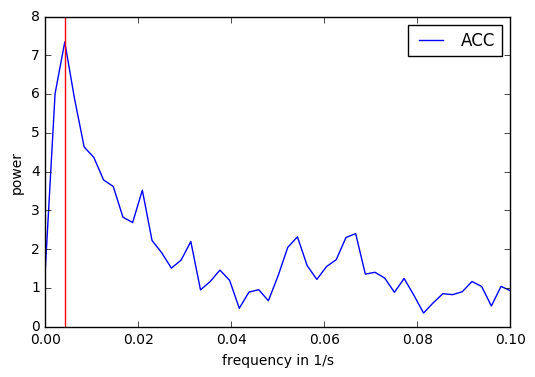

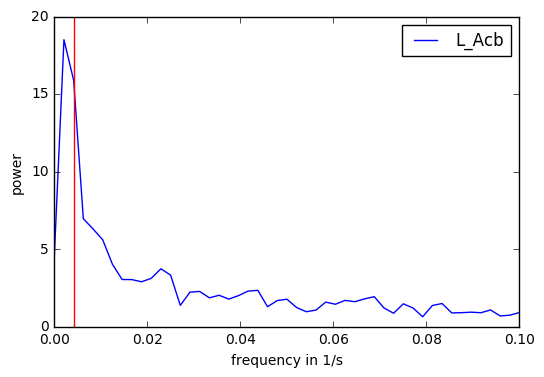

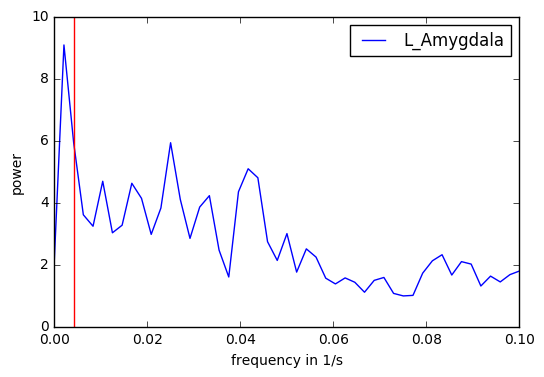

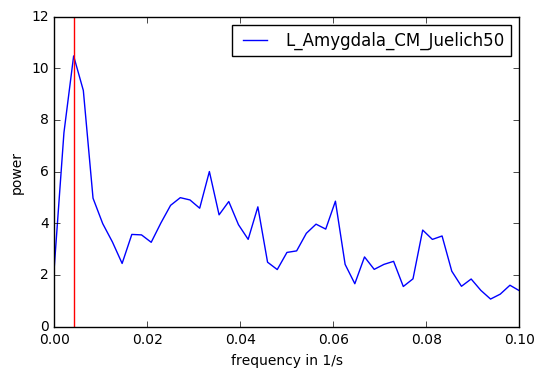

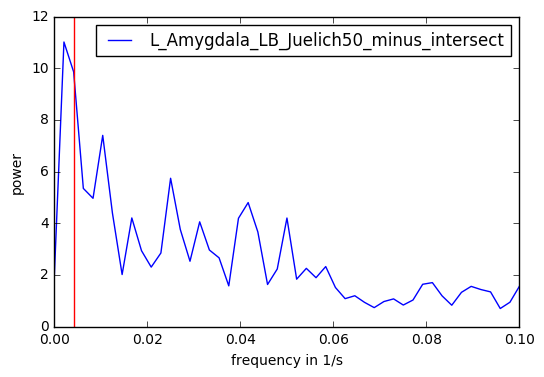

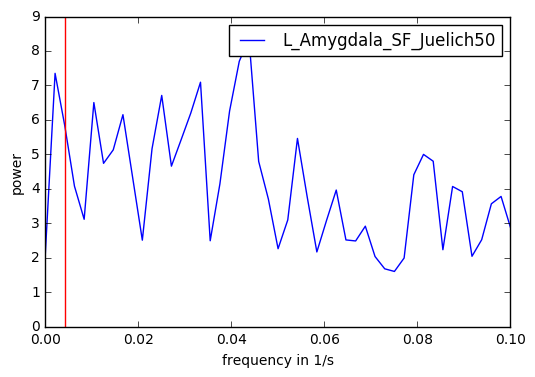

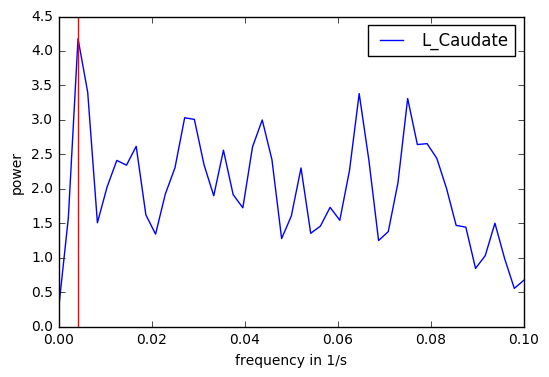

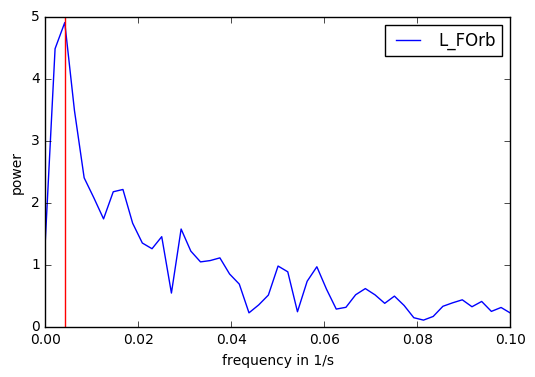

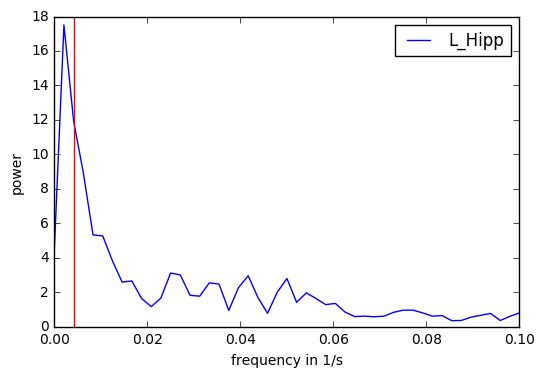

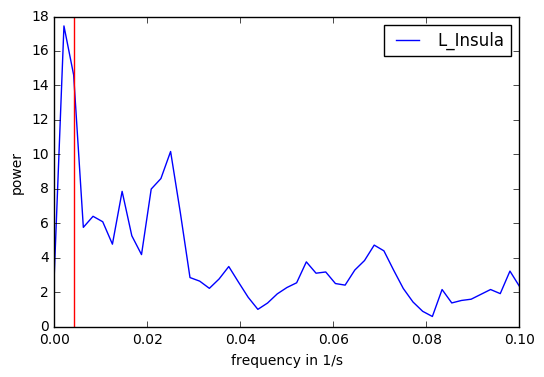

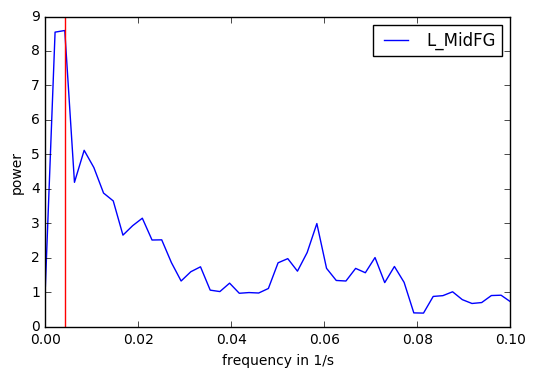

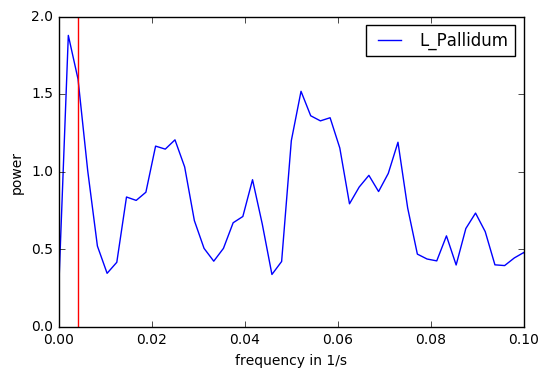

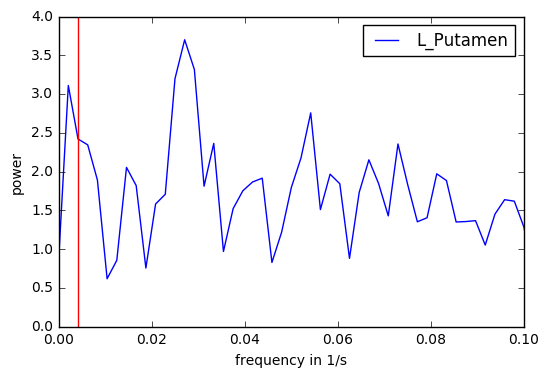

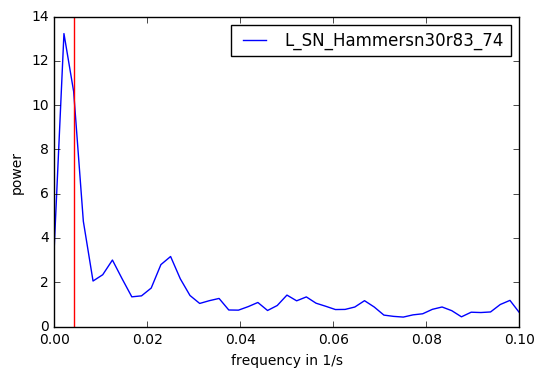

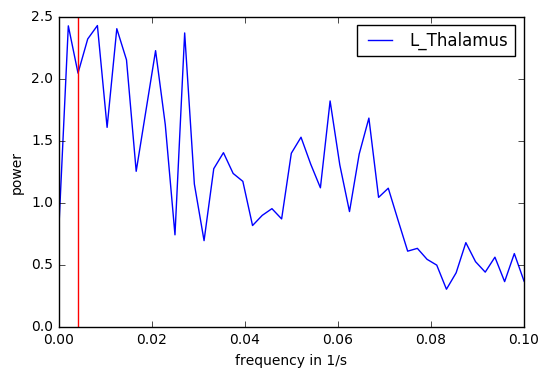

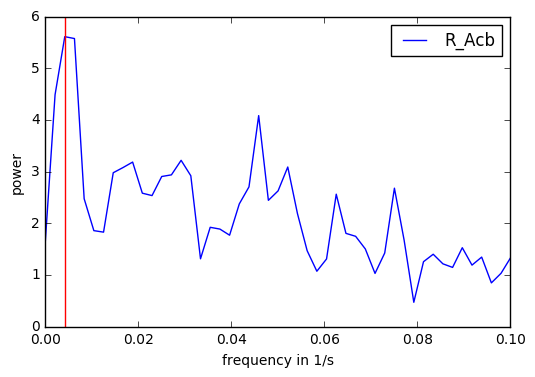

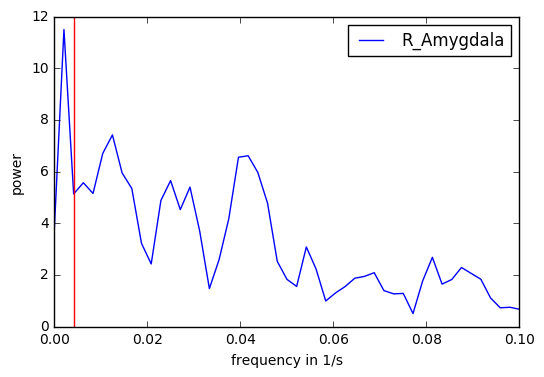

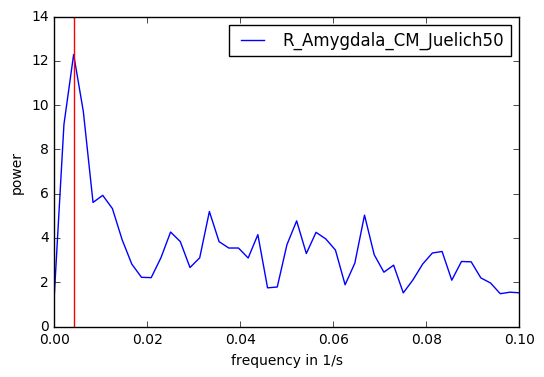

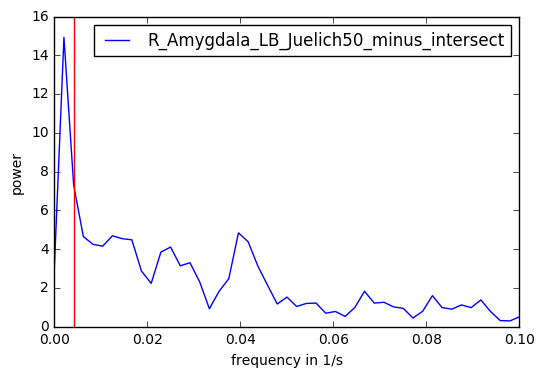

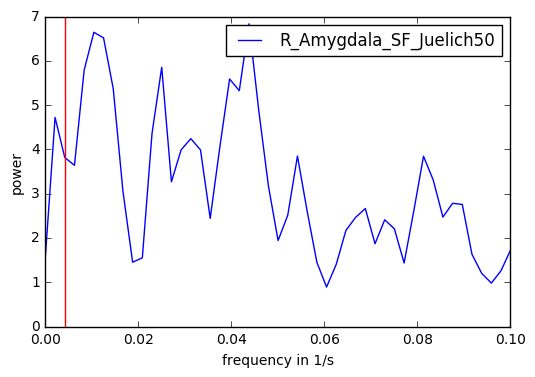

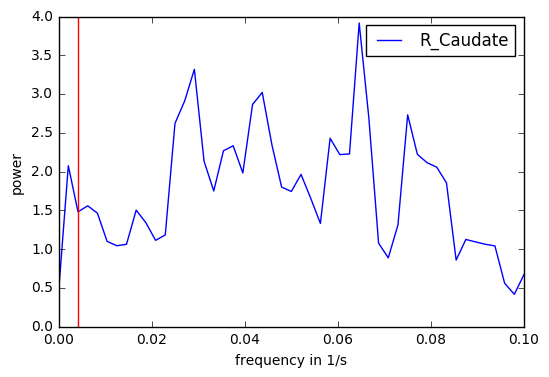

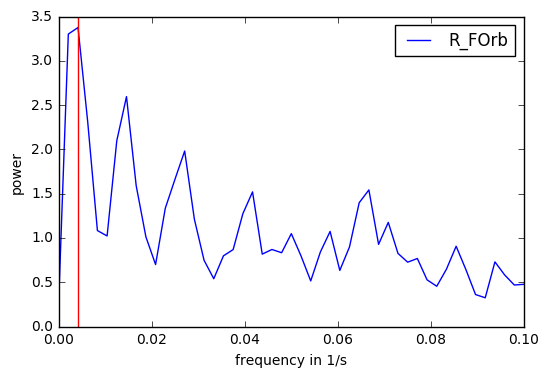

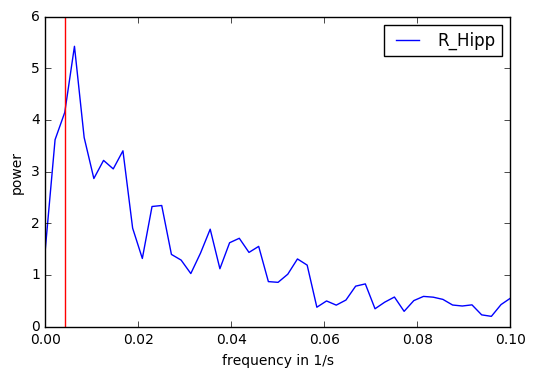

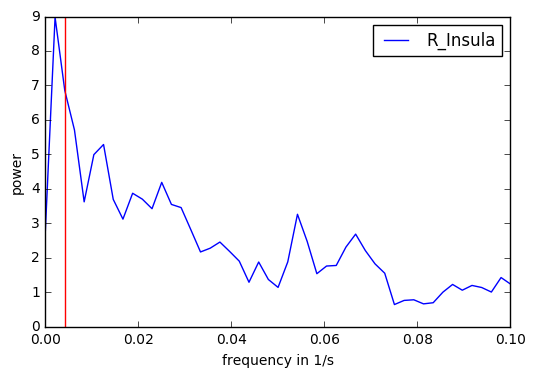

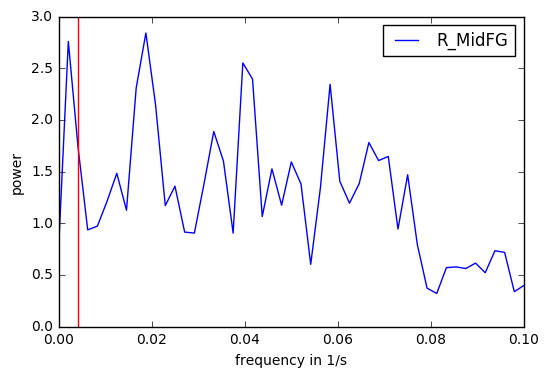

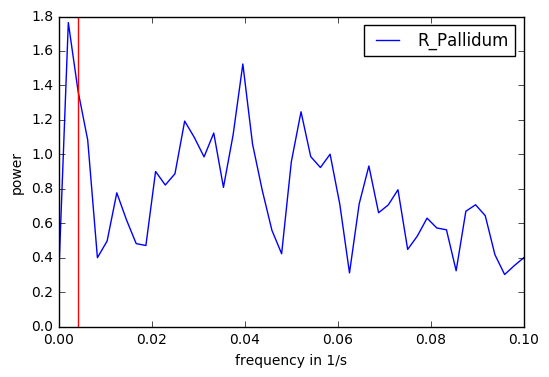

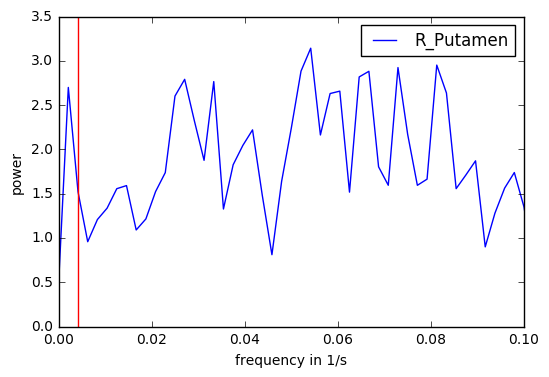

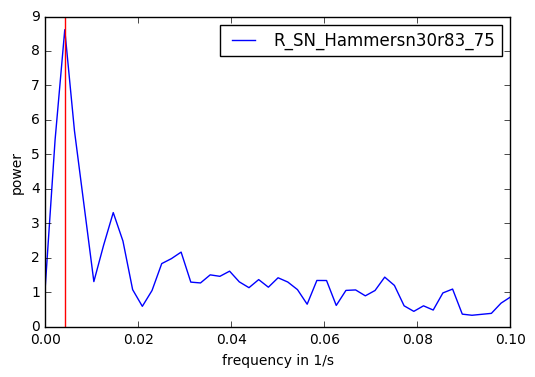

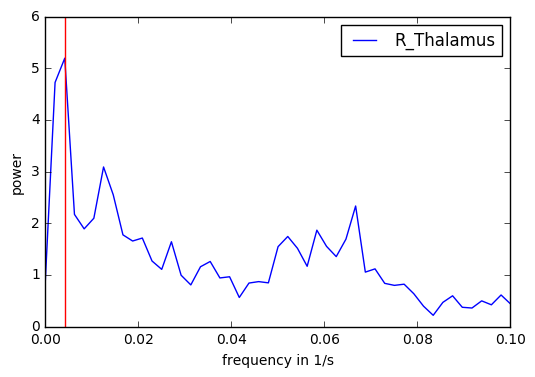

In [26]:
powerspectra = None
for region,roiname in zip(data_puffs_nofilter,roinames):
    f,ps = welch(region,fs=1/0.802,nperseg=598)
    plt.figure()
    plt.plot(f,ps,label=roiname[0])
    plt.xlim((0,0.1))
    plt.xlabel("frequency in 1/s")
    plt.ylabel("power")
    plt.axvline(x=1/240.0,color="r")
    plt.legend()
    if powerspectra is None:
        powerspectra  = ps
    else:
        powerspectra = np.vstack((powerspectra,ps))


In [27]:
print(f)

[ 0.          0.00208509  0.00417018  0.00625526  0.00834035  0.01042544
  0.01251053  0.01459562  0.01668071  0.01876579  0.02085088  0.02293597
  0.02502106  0.02710615  0.02919124  0.03127632  0.03336141  0.0354465
  0.03753159  0.03961668  0.04170177  0.04378685  0.04587194  0.04795703
  0.05004212  0.05212721  0.0542123   0.05629738  0.05838247  0.06046756
  0.06255265  0.06463774  0.06672283  0.06880791  0.070893    0.07297809
  0.07506318  0.07714827  0.07923335  0.08131844  0.08340353  0.08548862
  0.08757371  0.0896588   0.09174388  0.09382897  0.09591406  0.09799915
  0.10008424  0.10216933  0.10425441  0.1063395   0.10842459  0.11050968
  0.11259477  0.11467986  0.11676494  0.11885003  0.12093512  0.12302021
  0.1251053   0.12719039  0.12927547  0.13136056  0.13344565  0.13553074
  0.13761583  0.13970091  0.141786    0.14387109  0.14595618  0.14804127
  0.15012636  0.15221144  0.15429653  0.15638162  0.15846671  0.1605518
  0.16263689  0.16472197  0.16680706  0.16889215  0.1

In [28]:
totalpower=np.mean(powerspectra,axis=1)
print(totalpower.shape)
print(powerspectra.shape)
scaled_PS = np.divide(powerspectra.T,totalpower).T
print(scaled_PS.shape)

sorted_PS =scaled_PS[scaled_PS[:,2].argsort()[::-1]]
sorted_roinames = roinames[scaled_PS[:,2].argsort()[::-1]]
print(sorted_PS.shape)

(29,)
(29, 300)
(29, 300)
(29, 300)


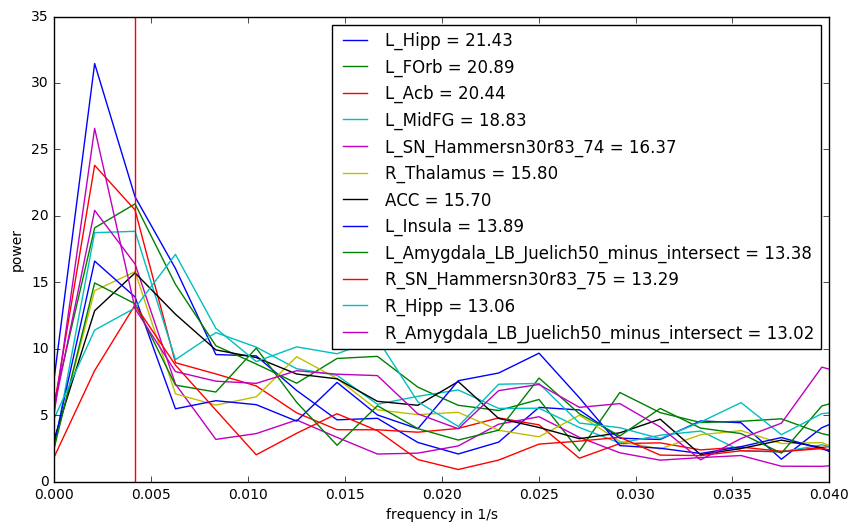

In [32]:
plt.figure(figsize=(10,6))
for spectra,roiname in zip(sorted_PS,sorted_roinames):
    if spectra[2] > 13:
        rel_strength = '{:2.2f}'.format(spectra[2])
        plt.plot(f,spectra,label=roiname[0]+" = "+rel_strength)
        plt.xlim((0,0.04))
    
plt.xlabel("frequency in 1/s")
plt.ylabel("power")
plt.axvline(x=1/240.0,color="r")
plt.legend()



In [30]:
for puff,pufftotal,roiname in zip(powerspectra.T[2],totalpower,roinames):
    print(puff,puff/pufftotal,roiname[0])

7.34129987876 15.6987755151 ACC
15.8886406855 20.4351652926 L_Acb
5.93443119617 6.19399948282 L_Amygdala
10.4732968324 9.62738725286 L_Amygdala_CM_Juelich50
9.85696397805 13.3772675226 L_Amygdala_LB_Juelich50_minus_intersect
5.82893213736 4.14580613039 L_Amygdala_SF_Juelich50
4.17829702413 9.35073220617 L_Caudate
4.90298591785 20.8941532454 L_FOrb
11.9211212063 21.4268566568 L_Hipp
14.6084342703 13.8860235082 L_Insula
8.59321919442 18.8323831397 L_MidFG
1.59633138361 5.49264740296 L_Pallidum
2.41939854474 5.40281238044 L_Putamen
10.6146014616 16.3739826833 L_SN_Hammersn30r83_74
2.04344533985 7.46760744123 L_Thalamus
5.6096728928 7.67961168773 R_Acb
5.13088392919 5.96819225647 R_Amygdala
12.2861111578 11.5969195326 R_Amygdala_CM_Juelich50
7.30709933644 13.0168305554 R_Amygdala_LB_Juelich50_minus_intersect
3.81743822557 4.16232041793 R_Amygdala_SF_Juelich50
1.48002184009 3.56473098103 R_Caudate
3.37576843019 12.1613481116 R_FOrb
4.14439515306 13.0622812617 R_Hipp
6.85463100021 11.2364451

In [31]:
for puff,roiname in zip(sorted_PS.T[2],sorted_roinames):
    print(puff,roiname[0])

21.4268566568 L_Hipp
20.8941532454 L_FOrb
20.4351652926 L_Acb
18.8323831397 L_MidFG
16.3739826833 L_SN_Hammersn30r83_74
15.7966297903 R_Thalamus
15.6987755151 ACC
13.8860235082 L_Insula
13.3772675226 L_Amygdala_LB_Juelich50_minus_intersect
13.2879726445 R_SN_Hammersn30r83_75
13.0622812617 R_Hipp
13.0168305554 R_Amygdala_LB_Juelich50_minus_intersect
12.1613481116 R_FOrb
11.5969195326 R_Amygdala_CM_Juelich50
11.2364451167 R_Insula
9.62738725286 L_Amygdala_CM_Juelich50
9.35073220617 L_Caudate
7.67961168773 R_Acb
7.46760744123 L_Thalamus
6.71483707065 R_MidFG
6.19399948282 L_Amygdala
5.96819225647 R_Amygdala
5.49264740296 L_Pallidum
5.40281238044 L_Putamen
5.19831308934 R_Pallidum
4.16232041793 R_Amygdala_SF_Juelich50
4.14580613039 L_Amygdala_SF_Juelich50
3.56473098103 R_Caudate
3.15538645878 R_Putamen
